In [1]:
import pandas as pd
import joblib as jb
from src.labeling import safe_transform

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import numpy as np

In [2]:
ruta = r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\titanic\titanic\titanic\data\test.csv'

In [3]:
data = pd.read_csv(ruta)

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
data.drop_duplicates()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
data.isna().count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin          418
Embarked       418
dtype: int64

### EDA

In [40]:
df = data.copy()

In [41]:
df.Age = df.Age.fillna(df.Age.mean())
df.Fare = df.Fare.fillna(df.Fare.mean())

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [43]:
#Column name
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())


In [44]:
#Cabin analysis
df['cabim_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])

In [45]:
#Ticket analysis
df['numeric_tiket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['letters_tiket']  = df.Ticket.apply(lambda x: ' '.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [46]:
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,cabim_multiple,cabin_adv,numeric_tiket,letters_tiket
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,n,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,0,n,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,n,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,n,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,0,n,1,0


In [47]:
df['norm_fare'] = np.log(df.Fare + 1) #+1 Para sacar valores negativos

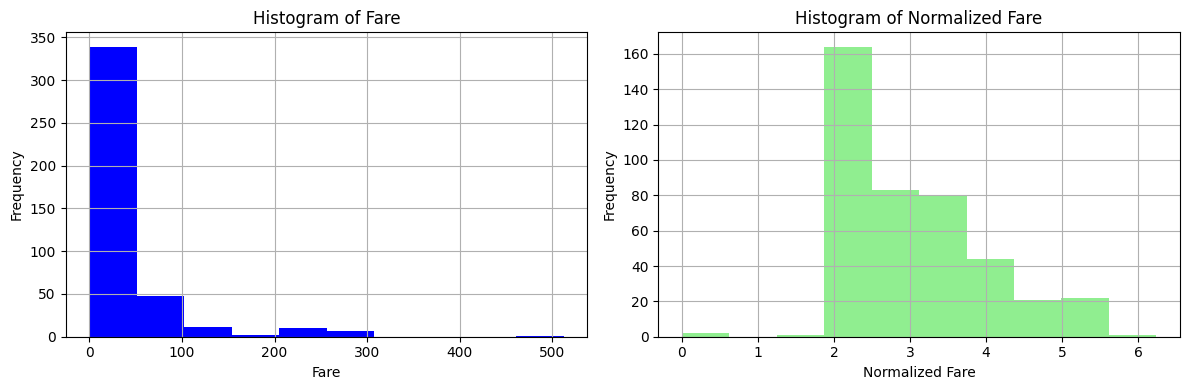

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 fila, 2 columnas

# Graficar el histograma de 'Fare' en el primer subplot
df.Fare.hist(ax=axes[0], color='blue', bins=10)
axes[0].set_title('Histogram of Fare')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Frequency')

# Graficar el histograma de 'norm_fare' en el segundo subplot
df.norm_fare.hist(ax=axes[1], color='lightgreen', bins=10)
axes[1].set_title('Histogram of Normalized Fare')
axes[1].set_xlabel('Normalized Fare')
axes[1].set_ylabel('Frequency')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [49]:
del df['Name']
del df['Fare']
del df['Ticket']
del df['Cabin']

In [50]:
#del df['PassengerId']

In [51]:
df['letters_tiket'] = df['letters_tiket'].astype('string')

### Labeling

In [52]:
df1 = df.copy()

In [53]:
df1.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,name_title,cabim_multiple,cabin_adv,numeric_tiket,letters_tiket,norm_fare
0,892,3,male,34.5,0,0,Q,Mr,0,n,1,0,2.178064
1,893,3,female,47.0,1,0,S,Mrs,0,n,1,0,2.079442
2,894,2,male,62.0,0,0,Q,Mr,0,n,1,0,2.369075


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
#import encoders
e_cabin = jb.load(r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\titanic\titanic\titanic\ml\e_cabin_adv.pkl')
e_embarked = jb.load(r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\titanic\titanic\titanic\ml\e_embarked.pkl')
e_letter = jb.load(r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\titanic\titanic\titanic\ml\e_letter_ticket.pkl')
e_name = jb.load(r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\titanic\titanic\titanic\ml\e_name_tittle.pkl')
e_sex = jb.load(r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\titanic\titanic\titanic\ml\e_sex.pkl')

In [56]:
df1['Sex'] = safe_transform(e_sex, df1['Sex'])

In [57]:
df1['cabin_adv'] = safe_transform(e_cabin, df['cabin_adv'])
df1['Embarked'] = safe_transform(e_embarked, df1['Embarked'])
df1['letters_tiket'] = safe_transform(e_letter ,df1['letters_tiket'])
df1['name_title'] = safe_transform(e_name ,df1['name_title'])

featuring

In [65]:
df1['delta_sex'] = df1['Sex']*10 + df1['norm_fare']
df1['delta_class'] = df1['Sex']*10 + df1['Pclass']

In [66]:
df1.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,name_title,cabim_multiple,cabin_adv,numeric_tiket,letters_tiket,norm_fare,delta_sex,delta_class
0,892,3,1,34.5,0,0,1,11,0,8,1,0,2.178064,12.178064,13
1,893,3,0,47.0,1,0,2,12,0,8,1,0,2.079442,2.079442,3
2,894,2,1,62.0,0,0,1,11,0,8,1,0,2.369075,12.369075,12
3,895,3,1,27.0,0,0,2,11,0,8,1,0,2.268252,12.268252,13
4,896,3,0,22.0,1,1,2,12,0,8,1,0,2.586824,2.586824,3


In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Pclass          418 non-null    int64  
 2   Sex             418 non-null    int64  
 3   Age             418 non-null    float64
 4   SibSp           418 non-null    int64  
 5   Parch           418 non-null    int64  
 6   Embarked        418 non-null    int64  
 7   name_title      418 non-null    int64  
 8   cabim_multiple  418 non-null    int64  
 9   cabin_adv       418 non-null    int64  
 10  numeric_tiket   418 non-null    int64  
 11  letters_tiket   418 non-null    int64  
 12  norm_fare       418 non-null    float64
 13  delta_sex       418 non-null    float64
 14  delta_class     418 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 49.1 KB


In [60]:
#Load model
model = jb.load(r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\titanic\titanic\titanic\ml\ml.pkl')

In [68]:
#Colums defined
id = df['PassengerId']
X = df1.drop(columns=['PassengerId'])

In [69]:
X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Embarked,name_title,cabim_multiple,cabin_adv,numeric_tiket,letters_tiket,norm_fare,delta_sex,delta_class
0,3,1,34.5,0,0,1,11,0,8,1,0,2.178064,12.178064,13
1,3,0,47.0,1,0,2,12,0,8,1,0,2.079442,2.079442,3
2,2,1,62.0,0,0,1,11,0,8,1,0,2.369075,12.369075,12


In [70]:
prediction = model.predict(X)

In [73]:
#Final dataframe
df_final = pd.DataFrame({
    'PassengerId':df['PassengerId'],
    'Survived': prediction
})

In [74]:
df_final.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [75]:
df_final.to_csv(r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\titanic\titanic\titanic\data\prediciton\pre.csv', index=False)